In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import datetime

In [2]:
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2022, 2, 4)
stocks = ['VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'PETR4.SA', 'MGLU3.SA']

## Download dos dados

In [3]:
data = {}

for stock in stocks:
    ticker = yf.download(stock, start_date, end_date)
    data[stock] = ticker['Adj Close']
stock_data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

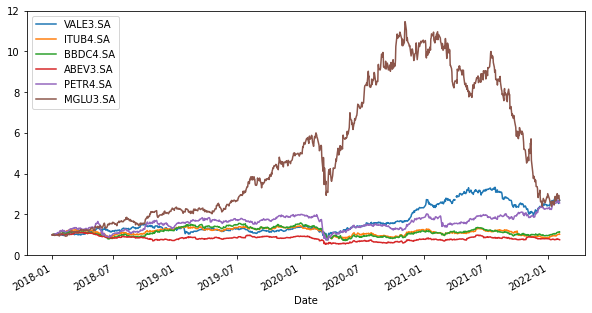

In [4]:
(stock_data / stock_data.iloc[0]).plot(figsize=(10,5))

## Cálculo dos retornos

In [5]:
returns = {}

for stock in stocks:
    returns[stock] = stock_data[stock].pct_change()

returns = pd.DataFrame(returns)
returns = returns[1:]

returns

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA
Date,,,,,,
2018-01-03,-0.005992,0.006837,0.004547,0.002305,0.009064,-0.012610
2018-01-04,0.004099,0.020824,0.016408,-0.005520,0.001796,0.024010
2018-01-05,0.015610,0.002883,0.005664,0.003700,0.005977,-0.019706
2018-01-08,0.022228,-0.003317,-0.000281,-0.001843,0.011884,0.000127
2018-01-09,-0.003701,-0.010870,-0.009296,-0.002770,0.000000,-0.024042
...,...,...,...,...,...,...
2022-01-28,-0.009824,0.012250,0.014363,-0.030519,-0.039551,-0.078947
2022-01-31,-0.033349,0.021783,0.008850,0.002679,-0.005839,0.055639
2022-02-01,0.054903,0.007018,0.003509,-0.008016,0.020093,-0.001424


## Cálculo do valor em risco

In [6]:
S = 1e4 # valor do investimento
c = 0.95 # intervalo de confiança
n = 1 # no dia seguinte
iterations = 10000 # número de simulações de Monte Carlo

In [7]:
var = {}

for stock in stocks:
    
    # podemos supor que os retornos diários sejam normalmente distribuídos:
    mu = np.mean(returns[stock])
    sigma = np.std(returns[stock])

    # criando as simulações:
    rand = np.random.normal(0, 1, [1, iterations])

    # equação para o preço das ações S(t)
    # o random walk do nosso investimento inicial
    stock_price = S * np.exp(n * (mu - 0.5 * sigma **2) + sigma * np.sqrt(n) * rand)

    # temos que ordenar os preços das ações para determinar o percentagem
    stock_price = np.sort(stock_price)

    # depende do nível de confiança: 95% -> 5% and 99% -> 1
    percentile = np.percentile(stock_price, (1 - c) * 100) # Calcular o percentil q dos dados ao longo do eixo especificado

    # a perda máxima possível tem algo a ver com a simulação que tem o menor valor
    var[stock] = S - percentile

In [8]:
tabela_var = pd.DataFrame(var.items(), columns=['stock', 'var'])
tabela_var.index = tabela_var['stock']
tabela_var.drop(['stock'], axis =1)

,var
stock,
VALE3.SA,415.797432
ITUB4.SA,359.141786
BBDC4.SA,399.706080
ABEV3.SA,336.023854
PETR4.SA,496.781860
MGLU3.SA,561.677350


<AxesSubplot:xlabel='stock'>

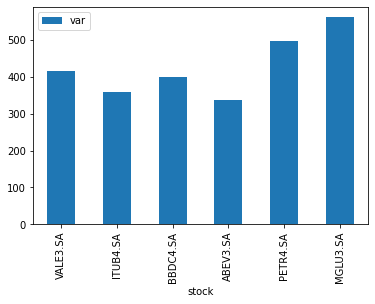

In [9]:
tabela_var.plot.bar()